# Carregar e Limpar dados ausentes e duplicados

[Dataset utilizado](https://www.kaggle.com/datasets/mdhamani/goodreads-books-100k/data?select=GoodReads_100k_books.csv)

Carregando

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Tentar carregar o dataset, ignorando as linhas problemáticas
df = pd.read_csv('/content/GoodReads_100k_books.csv', engine='python', on_bad_lines='skip')

# Verificar se todas as linhas foram carregadas corretamente
print(f"Número de linhas carregadas: {df.shape[0]}")

# Exibir as primeiras linhas do DataFrame
df.head()


Número de linhas carregadas: 45211


,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings
0,Laurence M. Hauptman,Hardcover,Reveals that several hundred thousand Indians ...,"History,Military History,Civil War,American Hi...",https://i.gr-assets.com/images/S/compressed.ph...,002914180X,9.78E+12,https://goodreads.com/book/show/1001053.Betwee...,0,3.52,5,Between Two Fires: American Indians in the Civ...,33
1,"Charlotte Fiell,Emmanuelle Dirix",Paperback,Fashion Sourcebook - 1920s is the first book i...,"Couture,Fashion,Historical,Art,Nonfiction",https://i.gr-assets.com/images/S/compressed.ph...,1906863482,9.78E+12,https://goodreads.com/book/show/10010552-fashi...,576,4.51,6,Fashion Sourcebook 1920s,41
2,Andy Anderson,Paperback,The seminal history and analysis of the Hungar...,"Politics,History",https://i.gr-assets.com/images/S/compressed.ph...,948984147,9.78E+12,https://goodreads.com/book/show/1001077.Hungar...,124,4.15,2,Hungary 56,26
3,Carlotta R. Anderson,Hardcover,"""All-American Anarchist"" chronicles the life a...","Labor,History",https://i.gr-assets.com/images/S/compressed.ph...,814327079,9.78E+12,https://goodreads.com/book/show/1001079.All_Am...,324,3.83,1,All-American Anarchist: Joseph A. Labadie and ...,6
4,Jean Leveille,NaN,"Aujourdâ€™hui, lâ€™oiseau nous invite Ã sa ta...",NaN,https://i.gr-assets.com/images/S/compressed.ph...,2761920813,NaN,https://goodreads.com/book/show/10010880-les-o...,177,4.00,1,Les oiseaux gourmands,1


In [3]:
# Substituir strings vazias por NaN, para reconhecer como valor ausente
df = df.replace('', np.nan)

Limpando duplicatas

In [4]:
# Contar duplicatas
print("Duplicatas antes:", df.duplicated().sum())

# Remover duplicatas
df.drop_duplicates(inplace=True)

# Verificar o resultado
print("Duplicatas depois:", df.duplicated().sum())


Duplicatas antes: 0
Duplicatas depois: 0


Limpando valores ausentes

In [5]:
# Verificar quantos valores ausentes há em cada coluna
missing_values = df.isnull().sum()
print(missing_values)


author             0
bookformat      1466
desc            2995
genre           4229
img             1338
isbn            5629
isbn13          4329
link               0
pages              0
rating             0
reviews            0
title              0
totalratings       0
dtype: int64


In [6]:
# Remover as linhas com valores ausentes em 'title', 'rating', 'reviews' e 'totalratings'
df = df.dropna(subset=['title', 'rating', 'reviews', 'totalratings'])

# Preencher valores ausentes com valores padrão
df['bookformat'] = df['bookformat'].fillna('Desconhecido')
df['desc'] = df['desc'].fillna('Descrição não fornecida')
df['genre'] = df['genre'].fillna('Gênero desconhecido')
df['img'] = df['img'].fillna('Imagem não fornecida')
df['isbn'] = df['isbn'].fillna('ISBN não fornecido')
df['isbn13'] = df['isbn13'].fillna('ISBN13 não fornecido')
df['link'] = df['link'].fillna('Link não fornecido')
df['pages'] = df['pages'].fillna('Páginas desconhecidas')

# Verificar se ainda há valores ausentes
print(df.isnull().sum())

# Remover duplicatas
df = df.drop_duplicates()

# Verificar o número de linhas após as mudanças
print(f"Número de linhas após tratamento de valores ausentes: {df.shape[0]}")


author          0
bookformat      0
desc            0
genre           0
img             0
isbn            0
isbn13          0
link            0
pages           0
rating          0
reviews         0
title           0
totalratings    0
dtype: int64
Número de linhas após tratamento de valores ausentes: 45211


In [7]:
# Exibir informações do DataFrame para confirmar a limpeza
print(df.info())
# Exibir as primeiras linhas do DataFrame para uma revisão visual
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   author        45211 non-null  object 
 1   bookformat    45211 non-null  object 
 2   desc          45211 non-null  object 
 3   genre         45211 non-null  object 
 4   img           45211 non-null  object 
 5   isbn          45211 non-null  object 
 6   isbn13        45211 non-null  object 
 7   link          45211 non-null  object 
 8   pages         45211 non-null  int64  
 9   rating        45211 non-null  float64
 10  reviews       45211 non-null  int64  
 11  title         45211 non-null  object 
 12  totalratings  45211 non-null  int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 4.5+ MB
None


,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings
0,Laurence M. Hauptman,Hardcover,Reveals that several hundred thousand Indians ...,"History,Military History,Civil War,American Hi...",https://i.gr-assets.com/images/S/compressed.ph...,002914180X,9.78E+12,https://goodreads.com/book/show/1001053.Betwee...,0,3.52,5,Between Two Fires: American Indians in the Civ...,33
1,"Charlotte Fiell,Emmanuelle Dirix",Paperback,Fashion Sourcebook - 1920s is the first book i...,"Couture,Fashion,Historical,Art,Nonfiction",https://i.gr-assets.com/images/S/compressed.ph...,1906863482,9.78E+12,https://goodreads.com/book/show/10010552-fashi...,576,4.51,6,Fashion Sourcebook 1920s,41
2,Andy Anderson,Paperback,The seminal history and analysis of the Hungar...,"Politics,History",https://i.gr-assets.com/images/S/compressed.ph...,948984147,9.78E+12,https://goodreads.com/book/show/1001077.Hungar...,124,4.15,2,Hungary 56,26
3,Carlotta R. Anderson,Hardcover,"""All-American Anarchist"" chronicles the life a...","Labor,History",https://i.gr-assets.com/images/S/compressed.ph...,814327079,9.78E+12,https://goodreads.com/book/show/1001079.All_Am...,324,3.83,1,All-American Anarchist: Joseph A. Labadie and ...,6
4,Jean Leveille,Desconhecido,"Aujourdâ€™hui, lâ€™oiseau nous invite Ã sa ta...",Gênero desconhecido,https://i.gr-assets.com/images/S/compressed.ph...,2761920813,ISBN13 não fornecido,https://goodreads.com/book/show/10010880-les-o...,177,4.00,1,Les oiseaux gourmands,1


# Análise exploratória dos dados

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

Distribuição dos Ratings

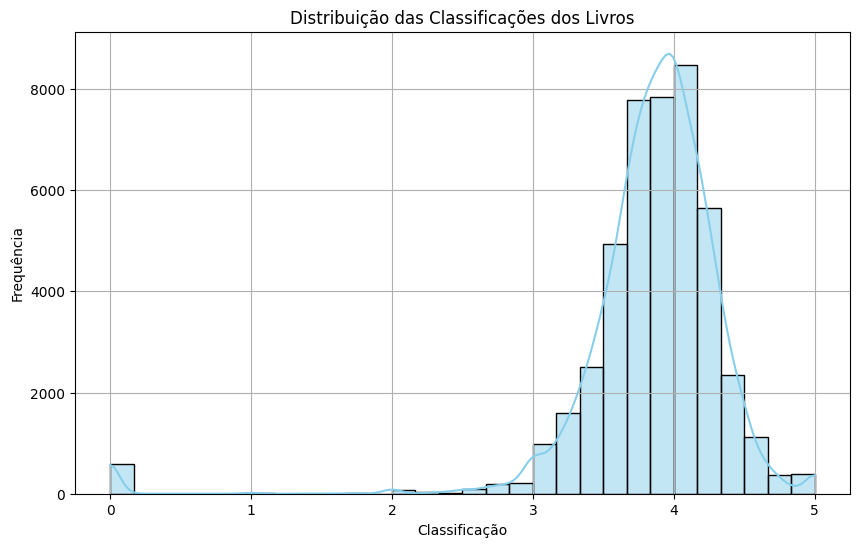

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribuição das Classificações dos Livros')
plt.xlabel('Classificação')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


Gêneros mais comuns

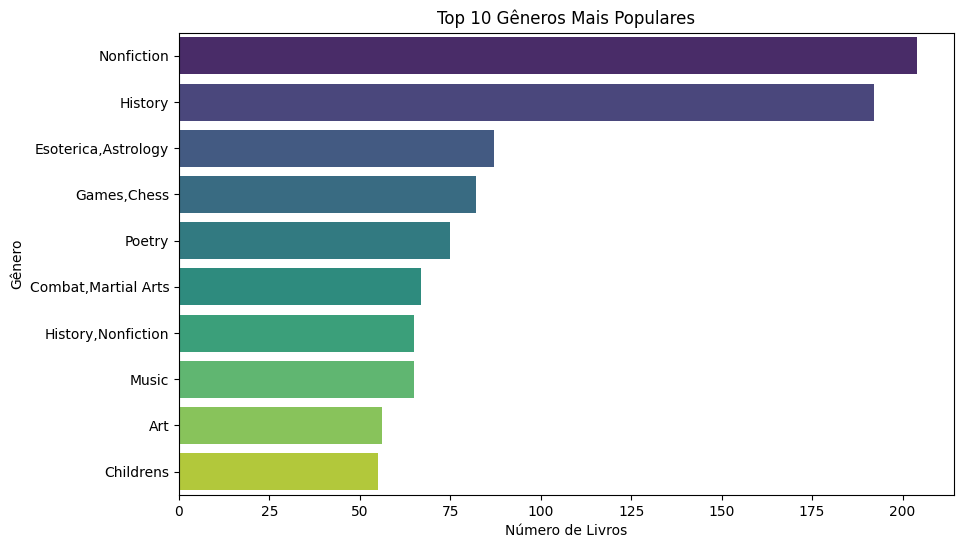

In [15]:
# Remover o "Gênero desconhecido" antes de plotar
genre_counts = df[df['genre'] != 'Gênero desconhecido']['genre'].value_counts().head(10)

# Visualizando os 10 gêneros mais populares com o ajuste de 'hue' e 'legend'
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis', hue=genre_counts.index, dodge=False)
plt.title('Top 10 Gêneros Mais Populares')
plt.xlabel('Número de Livros')
plt.ylabel('Gênero')
plt.legend([],[], frameon=False)  # Remover a legenda
plt.show()


Autores mais populares

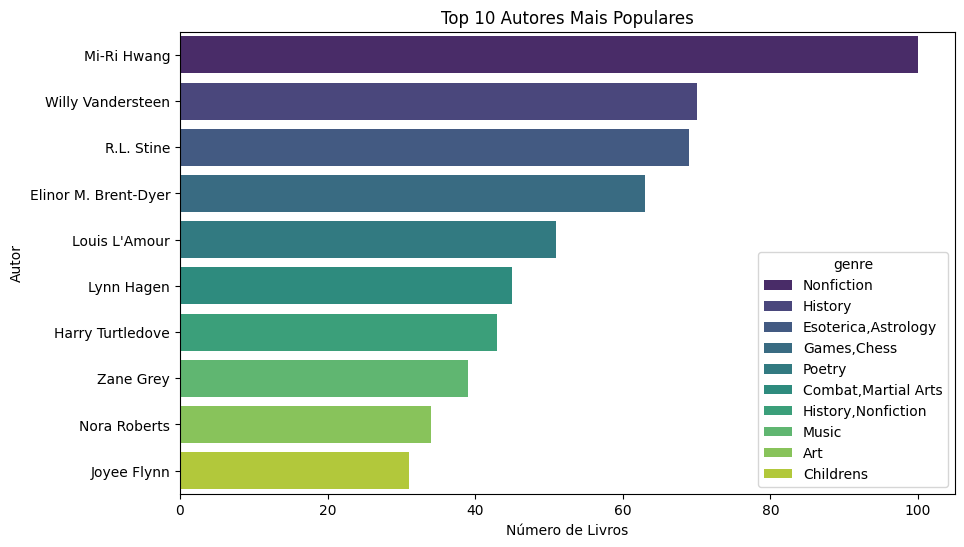

In [16]:
author_counts = df['author'].value_counts().head(10)

# Visualizando os 10 autores mais populares
plt.figure(figsize=(10, 6))
sns.barplot(x=author_counts.values, y=author_counts.index, palette='viridis', hue=genre_counts.index, dodge=False)
plt.title('Top 10 Autores Mais Populares')
plt.xlabel('Número de Livros')
plt.ylabel('Autor')
plt.show()


Livros com maior e menor média de avaliação

In [23]:
# Top 10 livros mais bem avaliados
top_rated_books = df[['title', 'rating']].sort_values(by='rating', ascending=False).head(10)

# 10 livros de pior avaliação
bottom_rated_books = df[['title', 'rating']].sort_values(by='rating', ascending=True).head(10)

print("Top 10 Livros Mais Bem Avaliados:")
print(top_rated_books)

print("\n10 Livros de pior Avaliação:")
print(bottom_rated_books)


Top 10 Livros Mais Bem Avaliados:
                                                   title  rating
43806  The Abels -Tasmania's Mountains Over 1100m Vol...     5.0
489    Early Anglo Saxon Art And Archaeology: Being T...     5.0
1477   Isis on the Nile. Egyptian Gods in Hellenistic...     5.0
20780                                  To BEE or not be?     5.0
32021                                   Wines of Lebanon     5.0
20781  Brauns Brauerei Atlas: Band 1: Mittelfranken u...     5.0
20782  Brauns Brauerei Atlas: Band 2: Unterfranken un...     5.0
33856  The Face of the Earth: Natural Landscapes, Sci...     5.0
19723                           British Mesozoic Fossils     5.0
42901       SÃ¤mtliche Klaviersonaten, Band Ii, (Urtext)     5.0

Bottom 10 Livros Menos Avaliados:
                                                   title  rating
38356            Labor Embattled: History, Power, Rights     0.0
6975   Study Guide and Working Papers to Accompany Ad...     0.0
20085  Modern Cults: 

Livros com ao mais de 3 avaliações

In [27]:
# Filtrando os livros com mais de 3 avaliações
filtered_books = df[df['reviews'] > 3]

# Top 10 livros mais bem avaliados
top_rated_books = filtered_books[['title', 'rating', 'reviews']].sort_values(by='rating', ascending=False).head(10)

# Bottom 10 livros menos bem avaliados
bottom_rated_books = filtered_books[['title', 'rating', 'reviews']].sort_values(by='rating').head(10)

# Exibindo as tabelas dos livros mais e menos bem avaliados
print("Top 10 Livros Mais Bem Avaliados:")
print(top_rated_books.to_string(index=False))

print("\ 10 Livros de pior Avaliação:")
print(bottom_rated_books.to_string(index=False))


Top 10 Livros Mais Bem Avaliados:
                                                                                                                                                                                          title  rating  reviews
                                                                                                                                                                           Living Enlightenment    4.95       74
                                                                                                                                                               Commentary on Genesis - Volume 1    4.93        5
                                                                                                                                                    Rejoice In My Gladness: The Life of Tahirih    4.85        4
A Psalter for Prayer: An Adaptation of the Classic Miles Coverdale Translation, Augmented by Prayers and Instructional Material Dr

Estatísticas descritivas

In [14]:
# Estatísticas descritivas para as colunas numéricas
desc_stats = df[['rating', 'pages', 'reviews', 'totalratings']].describe()

# Exibindo as estatísticas
print(desc_stats)


             rating         pages        reviews  totalratings
count  45211.000000  45211.000000   45211.000000  4.521100e+04
mean       3.839172    259.452832     178.648581  3.129072e+03
std        0.582122    468.413522    1499.208405  3.772687e+04
min        0.000000      0.000000       0.000000  0.000000e+00
25%        3.670000    142.000000       3.000000  3.400000e+01
50%        3.910000    240.000000      15.000000  1.550000e+02
75%        4.130000    336.000000      67.000000  7.910000e+02
max        5.000000  70000.000000  158776.000000  3.819326e+06
